In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/placement.csv")

df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [4]:
df.shape

(200, 2)

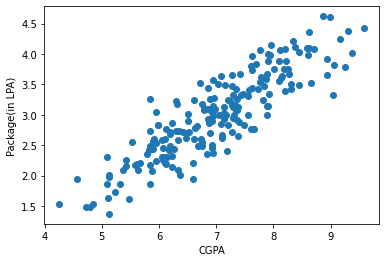

In [5]:
plt.scatter(x=df['cgpa'], y=df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")
plt.show()

In [6]:
# Split the dataset

X = df[['cgpa']]
y = df['package']

In [7]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [8]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [11]:
x_train.shape, x_test.shape

((160, 1), (40, 1))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X=x_train, y=y_train)

LinearRegression()

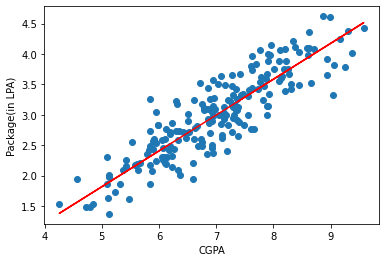

In [15]:
plt.scatter(x=df['cgpa'], y=df['package'])
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")
plt.show()

## Let's calculate the model performance

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
y_predicted = lr.predict(X=x_test)

In [18]:
y_predicted

array([4.39751239, 4.32680345, 3.10707437, 3.11885919, 2.5355105 ,
       2.1583962 , 3.16010607, 2.44712434, 2.28213683, 3.55489761,
       3.07761232, 3.84362575, 3.16010607, 2.51783327, 4.00272085,
       2.84780829, 2.77709936, 3.24259983, 2.93030204, 2.94797928,
       3.42526457, 1.7282502 , 4.1382463 , 2.83602347, 2.33516853,
       3.17189089, 3.54311279, 1.88734529, 2.82423864, 3.35455564,
       3.20724536, 2.31159889, 2.37641541, 3.19546054, 3.94968915,
       2.34106094, 2.9597641 , 3.45472662, 2.70639042, 2.31159889])

In [19]:
print("MAE: ", mean_absolute_error(y_true=y_test, y_pred=y_predicted))

MAE:  0.31001787170563705


In [20]:
print("MSE: ", mean_squared_error(y_true=y_test, y_pred=y_predicted))

MSE:  0.14551953158290803


In [21]:
print("RMSE: ", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_predicted)))

RMSE:  0.38147022371727524


In [22]:
r2 = r2_score(y_true=y_test, y_pred=y_predicted)

print("R2 Socre: ", r2)

R2 Socre:  0.651675487510094


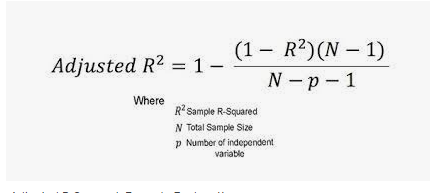

In [23]:
# Adjusted R2 Score

adjusted_r2 = 1 - ( (1-r2) * (x_test.shape[0]-1) / (x_test.shape[0]-1-1) )

adjusted_r2

0.6425090529708859

### Add new random columns to examine the Adjusted R2 socre

In [24]:
df2 = df.copy()

In [25]:
df2['random_feature'] = np.random.random(size=200)

In [26]:
df2.head()

,cgpa,package,random_feature
0,6.89,3.26,0.590420
1,5.12,1.98,0.003819
2,7.82,3.25,0.172667
3,7.42,3.67,0.891863
4,6.94,3.57,0.451350


In [27]:
# Re-arrange the columns

df2 = df2[['cgpa', 'random_feature', 'package']]
df2.head()

,cgpa,random_feature,package
0,6.89,0.590420,3.26
1,5.12,0.003819,1.98
2,7.82,0.172667,3.25
3,7.42,0.891863,3.67
4,6.94,0.451350,3.57


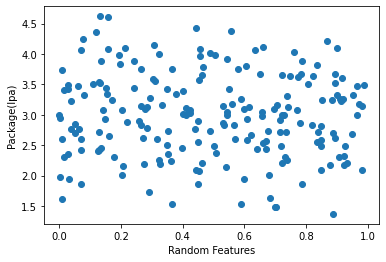

In [28]:
plt.scatter(x=df2['random_feature'], y=df2['package'])
plt.xlabel("Random Features")
plt.ylabel("Package(lpa)")
plt.show()

In [29]:
X2 = df2[['cgpa', 'random_feature']]
y2 = df2['package']

In [30]:
X2.head()

,cgpa,random_feature
0,6.89,0.590420
1,5.12,0.003819
2,7.82,0.172667
3,7.42,0.891863
4,6.94,0.451350


In [31]:
y2

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X2, y2, test_size=0.2,random_state=2)

In [33]:
lr2 = LinearRegression()

In [34]:
lr2.fit(X=xtrain, y=ytrain)

LinearRegression()

In [35]:
lr2.score(X=xtest, y=ytest)

0.7819754344588926

In [36]:
ypred = lr2.predict(X=xtest)

In [37]:
ypred

array([3.9464372 , 3.15182578, 2.37652536, 2.62132738, 1.59141064,
       1.79141686, 2.09948961, 2.95562446, 3.81337705, 2.94241517,
       4.12868489, 3.49806645, 2.96700597, 2.34976244, 3.13514577,
       3.43604751, 1.88852948, 3.29294765, 2.97925182, 3.42848357,
       2.60482933, 3.16529067, 2.86801036, 3.09773424, 3.65396351,
       2.86560006, 3.47927522, 3.36172844, 3.89658397, 1.97477426,
       3.68743346, 3.23893067, 3.70450235, 2.79815948, 2.83057522,
       3.2625291 , 3.49591213, 2.65960475, 2.6236099 , 2.7587752 ])

In [38]:
R2 = r2_score(y_true=ytest, y_pred=ypred)

print("R2 Socre: ", R2)

R2 Socre:  0.7819754344588926


In [39]:
# Adjusted R2 Score

adjusted_R2 = 1 - ( (1-R2) * (xtest.shape[0]-1) / (xtest.shape[0]-1-1) )

adjusted_R2

0.7762379458920214

### Now add a relevant column to check the Adjusted R2 score

If the column are irrelevant then Adjusted R2 score value will be decrease and if relevant then vlaue should be increase

In [40]:
df3 = df.copy()

df3['iq'] = df3['package'] + (np.random.randint(low=-12, high=12, size=200)/10)

df3 = df3[['cgpa','iq','package']]

In [41]:
df3.head()

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,1.28,1.98
2,7.82,2.45,3.25
3,7.42,3.67,3.67
4,6.94,2.47,3.57


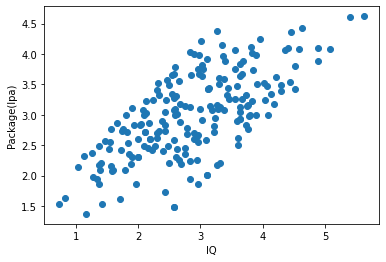

In [42]:
plt.scatter(x=df3['iq'], y=df3['package'])
plt.xlabel("IQ")
plt.ylabel("Package(lpa)")
plt.show()

In [43]:
df3.sample(7)

,cgpa,iq,package
153,7.94,3.89,3.99
183,7.28,1.82,2.72
127,6.78,1.91,3.11
13,6.93,2.39,2.89
41,6.89,2.30,2.70
28,5.94,2.84,2.24
57,6.60,2.84,1.94


In [44]:
x3 = df3.iloc[:, 0:2]
y3 = df3.iloc[:, -1]

In [45]:
x3.head()

,cgpa,iq
0,6.89,3.66
1,5.12,1.28
2,7.82,2.45
3,7.42,3.67
4,6.94,2.47


In [46]:
y3.tail()

195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, dtype: float64

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(x3, y3, test_size=0.2, random_state=2022)

In [48]:
lr3 = LinearRegression()

In [49]:
lr3.fit(X=xtrain, y=ytrain)

LinearRegression()

In [50]:
ypred = lr3.predict(X=xtest)
ypred

array([3.04543484, 2.45964055, 3.58541372, 2.74845136, 3.4752119 ,
       3.10896297, 3.9342576 , 2.76383218, 3.10122359, 2.47194299,
       3.04745076, 1.83481123, 3.52474872, 1.9522212 , 3.21630722,
       4.20355782, 2.3769095 , 3.63855184, 3.22288343, 2.51765493,
       2.42092703, 2.21228905, 2.72575337, 4.32999598, 2.44617217,
       3.46153379, 2.87181391, 1.99178746, 2.54554515, 1.45169957,
       2.38846267, 2.88760864, 4.10206267, 3.13125259, 3.30306733,
       2.21463202, 2.81771403, 3.16678148, 3.26721693, 2.98159075])

In [51]:
# Aactual output

print(list(ytest))

[3.09, 2.3, 3.14, 2.01, 3.83, 3.18, 3.89, 2.7, 2.51, 2.6, 3.08, 1.37, 3.76, 2.3, 3.16, 4.08, 2.84, 3.99, 2.94, 2.31, 2.31, 1.86, 2.59, 4.02, 2.87, 4.0, 3.0, 2.09, 3.26, 1.53, 2.17, 2.21, 3.33, 2.76, 3.26, 2.18, 1.94, 2.99, 3.48, 2.83]


In [52]:
R2 = r2_score(y_true=ytest, y_pred=ypred)

print("R2 Socre: ", R2)

R2 Socre:  0.7181146833130908


In [53]:
# Adjusted R2 Score

adjusted_R2 = 1 - ( (1-R2) * (xtest.shape[0]-1) / (xtest.shape[0]-1-1) )

adjusted_R2

0.7106966486634353